In [42]:
import pandas as pd
import os
os.getcwd()
os.chdir('E:\\DS ASSIGNMENTS\\11.Text Mining')
os.listdir()

['Assignment.txt',
 'Elon_musk.csv',
 'negative-words.txt',
 'positive-words.txt',
 'stop.txt']

In [6]:
uncleaned_data = pd.read_csv("Elon_musk.csv",encoding = "ISO-8859-1")
uncleaned_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [7]:
uncleaned_data.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [8]:
uncleaned_data.columns

Index(['Unnamed: 0', 'Text'], dtype='object')

In [9]:
uncleaned_data.shape

(1999, 2)

In [10]:
uncleaned_data.dtypes

Unnamed: 0     int64
Text          object
dtype: object

In [11]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [12]:
uncleaned_data.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [13]:
uncleaned_data.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [14]:
uncleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [15]:
#Load stop words
stop = pd.read_csv('stop.txt', encoding = "ISO-8859-1")
stop.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [16]:
uncleaned_data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [17]:
raw_tweets = uncleaned_data.copy()

In [18]:
#Remove all types of punctuations, numbers, special characters and lower letters
import re #regular expression
import string

def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text

raw_tweets['Text'] = uncleaned_data['Text'].apply(clean_text)
raw_tweets

,Unnamed: 0,Text
0,1,im an alien
1,2,ray tracing on cyberpunk with hdr is next-lev...
2,3,great interview!
3,4,doge is underestimated
4,5,congratulations tesla china for amazing execu...
...,...,...
1994,1995,"true, it sounds so surreal, but the negative ..."
1995,1996,make sure to read ur terms &amp; conditions b...
1996,1997,samwise gamgee
1997,1998,altho dumb and dumber is <u+0001f525><u+0001f...


In [19]:
def thorough_clean(text):
    text = re.sub('[^A-Za-z0-9]', ' ', text)
    return(text)

raw_tweets['Text'] = raw_tweets['Text'].apply(thorough_clean)
raw_tweets

,Unnamed: 0,Text
0,1,i m an alien
1,2,ray tracing on cyberpunk with hdr is next lev...
2,3,great interview
3,4,doge is underestimated
4,5,congratulations tesla china for amazing execu...
...,...,...
1994,1995,true it sounds so surreal but the negative ...
1995,1996,make sure to read ur terms amp conditions b...
1996,1997,samwise gamgee
1997,1998,altho dumb and dumber is u 0001f525 u 0001f...


In [20]:
#Word frequency of raw_tweets
freq_uncleaned = pd.Series(' '.join(raw_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [21]:
#clean stop words data
stop = [a.strip() for a in stop.a] # remove both the leading and the trailing characters
stop = [a for a in stop if a] # removes empty strings, because they are considered in Python as False
stop[0:10]

["a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards']

In [22]:
final_tweets = raw_tweets.copy()

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sureksha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
from nltk.corpus import stopwords

In [25]:
#removing stopwords

final_tweets['Text'] = raw_tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [26]:
final_tweets

,Unnamed: 0,Text
0,1,alien
1,2,ray tracing cyberpunk hdr level
2,3,great interview
3,4,doge underestimated
4,5,congratulations tesla china amazing execution ...
...,...,...
1994,1995,true sounds surreal negative propaganda amp ea...
1995,1996,make read ur terms amp conditions clicking accept
1996,1997,samwise gamgee
1997,1998,altho dumb dumber 0001f525 0001f525


In [27]:
#word frequency after removal of stopwords
freq_cleaned = pd.Series(' '.join(final_tweets['Text']).split()).value_counts()[:20] # for top 20
freq_cleaned

a           357
amp         219
rt          127
tesla        97
0001f923     77
great        76
haha         55
good         51
launch       49
yeah         41
dragon       39
1            38
spacex       37
true         35
high         34
3            34
make         33
people       32
starship     31
year         31
dtype: int64

In [28]:
# Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(final_tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\Sureksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

          term  occurrences  frequency
321        amp          219   0.024269
2765        rt          127   0.014074
3238     tesla           97   0.010749
59    0001f923           77   0.008533
1496     great           76   0.008422


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

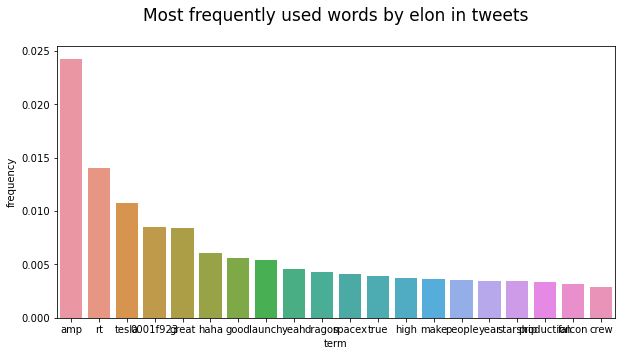

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
#plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 17)

In [31]:
#TFIDF - Term frequency inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(final_tweets["Text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features)

C:\Users\Sureksha\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
df.head(10)

,000,0001f1e9,0001f1ea,0001f339,0001f3b6,0001f440,0001f44c,0001f44d,0001f495,0001f4ab,...,worth,wow,wrong,ya,yeah,year,years,yesterday,yup,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.402126,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.609404,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [33]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [34]:
top2_words = get_top_n2_words(final_tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head()

,Bi-gram,Freq
0,0001f923 0001f923,35
1,rt falcon,17
2,crew dragon,13
3,giga berlin,12
4,falcon stage,9


Text(0.5, 1.05, 'Most two words used together in tweets by elon')

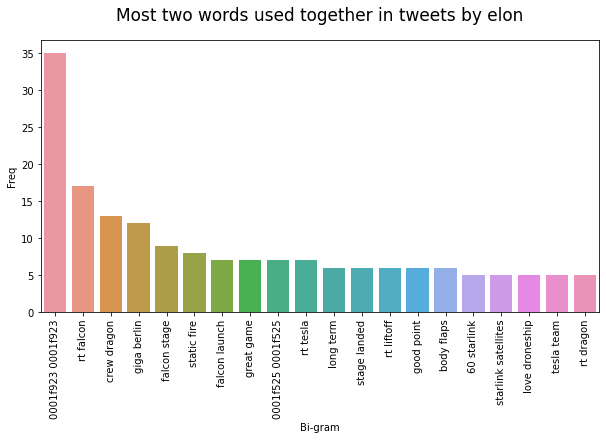

In [35]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])
plt.title("Most two words used together in tweets by elon", y=1.05, fontsize=17)

In [36]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [37]:
top3_words = get_top_n3_words(final_tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
top3_df

,Tri-gram,Freq
0,rt falcon stage,8
1,falcon stage landed,6
2,60 starlink satellites,5
3,dragon operational mission,5
4,rt falcon launches,4
...,...,...
195,top speed tires,1
196,production car achieve,1
197,plaid model ships,1
198,model ships month,1


Text(0.5, 1.05, 'Most three words used together in tweets by elon')

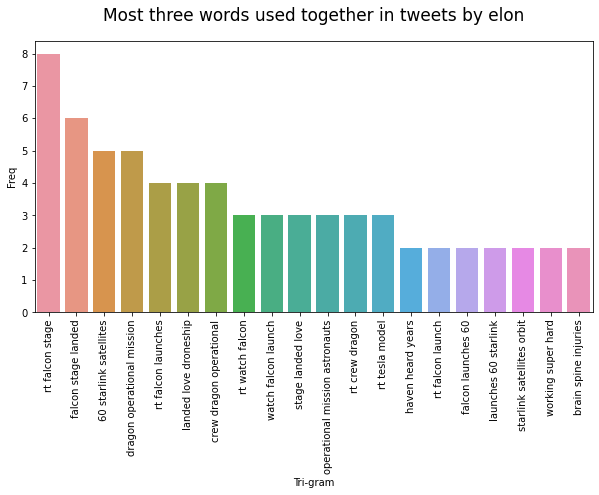

In [38]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"])
plt.title("Most three words used together in tweets by elon", y=1.05, fontsize=17)

In [39]:
string_Total = " ".join(final_tweets["Text"])

In [57]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 655.2 kB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

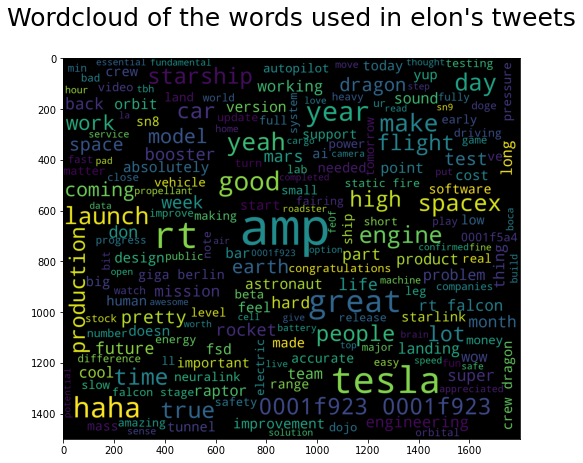

In [58]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200,
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)

# Named Entity Recognition

In [60]:
!pip install spacy

     ---------------------------------------- 11.9/11.9 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 96.8/96.8 kB 692.2 kB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 2.0 MB/s eta 0:00:00


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 481.4/481.4 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.4 MB/s eta 0:00:00
     -------------------------------------- 181.6/181.6 kB 1.8 MB/s eta 0:00:00
     -------------------------------------- 48.9/48.9 kB 821.7 kB/s eta 0:00:00
     -------------------------------------- 58.6/58.6 kB 620.5 kB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 3.5 MB/s eta 0:00:00
  Attempting uninstall: smart-open
    Found existing installation: smart-open 5.1.0
    Uninstalling smart-open-5.1.0:
      Successfully uninstalled smart-open-5.1.0


In [61]:
import string # special operations on strings
import spacy # language models

In [65]:
import sys
!{sys.executable} -m pip install spacy
!{sys.executable} -m spacy download en


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 12.8/12.8 MB 3.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [67]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

one_block = final_tweets.Text.iloc[20]                                       
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [68]:
for token in doc_block[0:1999]:                                         #POS tagging for all the cleaned dat
    print(token, token.pos_)

crypto PROPN
wallet PROPN
won VERB
give VERB
private ADJ
keys NOUN
avoided VERB
costs NOUN


In [69]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our cleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our cleaned data: ['won', 'give', 'keys', 'avoided', 'costs']


In [70]:
one_block1 = uncleaned_data.Text.loc[4]            #We will use POS tagging on uncleaned data, as it gives better reults
doc_block1 = nlp(one_block1)
spacy.displacy.render(doc_block1, style='ent', jupyter=True)

In [71]:
for token in doc_block1[0:1999]:                                         #POS tagging for all the uncleaned data
    print(token, token.pos_)

@teslacn PROPN
Congratulations PROPN
Tesla PROPN
China PROPN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
. PUNCT
Now ADV
on ADV
to ADP
the DET
next ADJ
for ADP
even ADV
more ADJ
! PUNCT
! PUNCT


In [72]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block1 if token.pos_ in ('NOUN', 'VERB')]
print("Nouns and verbs in our uncleaned data:", nouns_verbs[0:1999])

Nouns and verbs in our uncleaned data: ['execution', 'year']


# Sentimental Analysis

In [73]:
final_tweets

,Unnamed: 0,Text
0,1,alien
1,2,ray tracing cyberpunk hdr level
2,3,great interview
3,4,doge underestimated
4,5,congratulations tesla china amazing execution ...
...,...,...
1994,1995,true sounds surreal negative propaganda amp ea...
1995,1996,make read ur terms amp conditions clicking accept
1996,1997,samwise gamgee
1997,1998,altho dumb dumber 0001f525 0001f525


In [75]:
!pip install textblob 

     -------------------------------------- 636.8/636.8 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [76]:
#create function to get subjective and polarity of tweets
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets


,Unnamed: 0,Text,subjectivity,polarity
0,1,alien,0.750000,-0.250000
1,2,ray tracing cyberpunk hdr level,0.000000,0.000000
2,3,great interview,0.750000,0.800000
3,4,doge underestimated,0.000000,0.000000
4,5,congratulations tesla china amazing execution ...,0.900000,0.600000
...,...,...,...,...
1994,1995,true sounds surreal negative propaganda amp ea...,0.508333,0.111111
1995,1996,make read ur terms amp conditions clicking accept,0.000000,0.000000
1996,1997,samwise gamgee,0.000000,0.000000
1997,1998,altho dumb dumber 0001f525 0001f525,0.500000,-0.375000


In [77]:
#create a function for negative, neutral, positive analysis
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets

,Unnamed: 0,Text,subjectivity,polarity,Analysis
0,1,alien,0.750000,-0.250000,Negative
1,2,ray tracing cyberpunk hdr level,0.000000,0.000000,Neutral
2,3,great interview,0.750000,0.800000,Positive
3,4,doge underestimated,0.000000,0.000000,Neutral
4,5,congratulations tesla china amazing execution ...,0.900000,0.600000,Positive
...,...,...,...,...,...
1994,1995,true sounds surreal negative propaganda amp ea...,0.508333,0.111111,Positive
1995,1996,make read ur terms amp conditions clicking accept,0.000000,0.000000,Neutral
1996,1997,samwise gamgee,0.000000,0.000000,Neutral
1997,1998,altho dumb dumber 0001f525 0001f525,0.500000,-0.375000,Negative


In [78]:
#print all positive tweets from most positive to least positive
positive_tweets = final_tweets[final_tweets['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Unnamed: 0,Text,subjectivity,polarity,Analysis
340,341,0001f3a9 greatest gatsby 0001f3a9,1.000000,1.000000,Positive
1836,1837,impressive tianwen 1 mars rover mission launch...,1.000000,1.000000,Positive
1901,1902,fermi awesome understood questions,1.000000,1.000000,Positive
1298,1299,lego movie awesome,1.000000,1.000000,Positive
231,232,awesome,1.000000,1.000000,Positive
...,...,...,...,...,...
1103,1104,article wildly incorrect lithium battery costs...,0.266667,0.016667,Positive
1327,1328,black scholes formula kinda bs big difference ...,0.344444,0.015873,Positive
150,151,unlike aircraft division fine faa space divisi...,0.450000,0.008333,Positive
207,208,launching small satellites a wide range custom...,0.462500,0.006250,Positive


In [79]:
#print all negative tweets from most negative to least negative
negative_tweets = final_tweets[final_tweets['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Unnamed: 0,Text,subjectivity,polarity,Analysis
1422,1423,boring tunnel vegas a months operational,1.000000,-1.000000e+00,Negative
1265,1266,insane,1.000000,-1.000000e+00,Negative
1660,1661,rt moon a base moon send people mars make,1.000000,-8.000000e-01,Negative
1273,1274,eerie parallels boring company amp vault tec b...,1.000000,-7.500000e-01,Negative
405,406,writing cobra kai sick 0001f44c,0.857143,-7.142857e-01,Negative
...,...,...,...,...,...
1014,1015,plays poor inventor card rich amp invented kn,0.675000,-1.250000e-02,Negative
971,972,roomy 3 vacuum rocket engines added,0.000000,-8.333333e-03,Negative
1349,1350,rt raptor vacuum engine rvac starship shipped ...,0.000000,-8.333333e-03,Negative
1416,1417,giant gap experimental medical device patients...,0.480000,-5.000000e-03,Negative


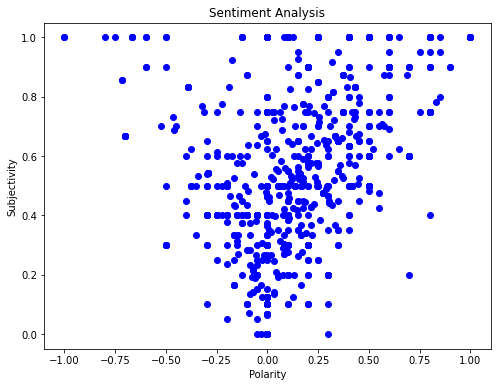

In [80]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
    plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

Majority of points lie from right of 0.0 of x-axis(Polarity).

In [81]:
#Get % of positive, negative, neutral tweets
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 31.7
% of negative tweets: 10.1


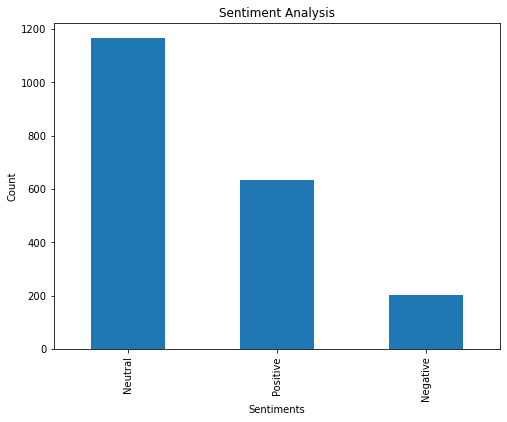

In [82]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()